# Kickoffs - NLP Disaster Tweets Prediction

<hr>

*Natural Language Processing with Disaster Tweets
Predict which Tweets are about real disasters and which ones are not.*

***The Dataset:***

Each sample in the train and test set has the following information:

- The text of a tweet
- A keyword from that tweet (although this may be blank!)
- The location the tweet was sent from (may also be blank)


Columns:
- id - a unique identifier for each tweet
- text - the text of the tweet
- location - the location the tweet was sent from (may be blank)
- keyword - a particular keyword from the tweet (may be blank)
- target - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)


<hr>

### Task 1: Data Loading and Handling Missing Values

**Instructions:**

1. Load the training dataset (`train.csv`) and store it in a variable called `data`.
2. Display basic information about the dataset (e.g., number of rows, columns, and data types).
3. Calculate the number of missing values in the "keyword" and "location" columns.
4. Drop the columns named "keyword" & "location" if too many values are missing. 

**Variables:**
- `data`: (store the loaded dataset)
- `data_cleaned`: (store the dataset after dropping missing rows or columns)


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.drop(['keyword','location'], inplace=True, axis=1)

In [4]:
data_cleaned = df.copy()

In [8]:
################ Don't edit or delete the cell, Run this cell to test your code  ################
try:
    q1 = data_cleaned
    from tweet_prediction import tweets
    tweets.save_ans1(q1)
except:
    print("Please check if the variable to the question has been assigned properly")

Test case 1 passed


In [9]:
from tweet_prediction import tweets
tweets.save_ans1(q1)

Test case 1 passed


### Task 2: Data Cleaning and Text Preprocessing

**Instructions:**

1. In this task, we will focus on cleaning the 'text' column. Initialize stopwords and load it in variable `sw`.
2. Initialize a `WordNetLemmatizer` object and assign it to a variable called `lemmatizer`.
3. Create a function `clean_text` to perform the following preprocessing steps on each tweet:
   - Remove any URLs from the text.
   - Remove any HTML tags.
   - Remove all non-alphabetical characters (punctuations, special symbols, etc.).
   - Remove stopwords using the NLTK `stopwords` list.
   - Apply lemmatization to each word using the `lemmatizer` object.
   - Remove any emojis present in the text.
4. Apply this `clean_text` function to the 'text' column of the DataFrame.
5. Store the cleaned text back into the 'text' column of `df`.
6. Display the first 5 rows of the cleaned data and save it in the variable `clean_df`.

**Variables:**
- `lemmatizer` (an instance of `WordNetLemmatizer` for lemmatization)
- `clean_text()` (function to clean and preprocess text)
- `clean_df`  (stores the first 5 rows of cleaned data)


In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2656818\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\2656818\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
### **Code Solution:**
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Initializing stopwords and lemmatizer
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# Define the cleaning function
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    html = re.compile(r'<.*?>')
    text = html.sub(r'', text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", " ", text)  # Remove punctuations
    text = [word for word in text.split() if word not in sw]  # Remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatization
    text = " ".join(text)

    # Removing emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    return text

# Apply the cleaning function to the 'text' column
df['text'] = df['text'].apply(clean_text)

# Display the first few rows of the cleaned data
clean_df = df.head()



In [12]:
################ Don't edit or delete the cell, Run this cell to test your code  ################
try:
    q2 = clean_df
    from tweet_prediction import tweets
    tweets.save_ans2(q2)
except:
    print("Please check if the variable to the question has been assigned properly")

Test case 2 passed


### Task 3: Create a Document-Term Matrix using Count Vectorizer

**Instructions:**

1. Use the `df['text']` column from the cleaned dataset and select the first two rows as `sample_corpora` for demonstration.
2. Initialize a `CountVectorizer` object and assign it to the variable `count_vectorizer`.
3. Fit the `count_vectorizer` to the `sample_corpora` and transform the data into a document-term matrix.
4. Create a list of document names (`doc_names`) for the matrix, labeling them as "Doc0", "Doc1", etc.
5. Extract the feature names (tokens) from the `count_vectorizer` and store them as `feat_names`.
6. Create a DataFrame to display the document-term matrix using the document names as the index and feature names as the columns. Store it in `sample_df`

**Variables:**
- `count_vectorizer` (CountVectorizer object)
- `doc_names` (list of document names)
- `feat_names` (list of feature names)
- `sample_df` (Save the new dataframe of document-term matrix)

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample data: using the first two rows of the cleaned 'text' column for demonstration
sample_corpora = df['text'].iloc[:2].values
print("Sample Corpora:")
print(sample_corpora)

# Initialize Count Vectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the sample corpora
wm = count_vectorizer.fit_transform(sample_corpora)

# Create document names
doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]

# Extract feature names (tokens)
feat_names = count_vectorizer.get_feature_names_out()

# Create a DataFrame to display the document-term matrix
sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names, columns=feat_names)

# Display the document-term matrix
print("\nDocument-Term Matrix:")
print(sample_df)



Sample Corpora:
['deed reason earthquake may allah forgive u'
 'forest fire near la ronge sask canada']

Document-Term Matrix:
      allah  canada  deed  earthquake  fire  forest  forgive  la  may  near  \
Doc0      1       0     1           1     0       0        1   0    1     0   
Doc1      0       1     0           0     1       1        0   1    0     1   

      reason  ronge  sask  
Doc0       1      0     0  
Doc1       0      1     1  


In [14]:
list(sample_df.iloc[1].values)

[0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]

In [15]:
################ Don't edit or delete the cell, Run this cell to test your code  ################
try:
    q3 = sample_df
    from tweet_prediction import tweets
    tweets.save_ans3(q3)
except:
    print("Please check if the variable to the question has been assigned properly")

Test case 3 passed


### Task 4: Apply TF-IDF Vectorization

**Instructions:**

1. **Explanation:**
   We use `TF-IDF` instead of `CountVectorizer` from Task 3 because `TF-IDF` better captures word importance by considering term frequency and document frequency.
2. Split the data into training and test sets. Use the `text` column as features (`X`) and the `target` column as labels (`y`). Set the test size to 20%, ramdom state of `123` and ensure stratification based on `target`.
3. Initialize a `TfidfVectorizer` object and assign it to the variable `tfidf_vectorizer`.
4. Fit the `tfidf_vectorizer` on the training data and transform it into TF-IDF vectors (`tfidf_train_vectors`).
5. Transform the test data using the fitted `tfidf_vectorizer` to create TF-IDF vectors (`tfidf_test_vectors`).
6. Display the shape of the resulting training and test vectors to ensure correct transformation.

**Variables:**
- `tfidf_vectorizer` (TF-IDF Vectorizer object)
- `tfidf_train_vectors` (TF-IDF vectors for the training set)
- `tfidf_test_vectors` (TF-IDF vectors for the test set)


In [16]:
### **Code Solution:**

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Sample Data Preparation: Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'].values,
    df['target'].values,
    test_size=0.2,
    random_state=123,
    stratify=df['target'].values
)

# Initialize TF-IDF Vectorizer
# np.random.seed(42)
tfidf_vectorizer = TfidfVectorizer()

# Fit TF-IDF Vectorizer on the training data and transform the training set
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

# Transform the test set using the fitted vectorizer
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# Display the shape of the resulting vectors to ensure correct transformation
print("Training Vector Shape:", tfidf_train_vectors.shape)
print("Test Vector Shape:", tfidf_test_vectors.shape)



Training Vector Shape: (6090, 12974)
Test Vector Shape: (1523, 12974)


In [17]:
tfidf_train_vectors.shape[1] > 0

True

In [18]:
11000 <= tfidf_train_vectors.shape[1] and tfidf_test_vectors.shape[1] <= 14000

True

In [19]:
################ Don't edit or delete the cell, Run this cell to test your code  ################
try:
    q4 = [X_train, X_test, tfidf_train_vectors, tfidf_test_vectors]
    from tweet_prediction import tweets
    tweets.save_ans4(q4)
except:
    print("Please check if the variable to the question has been assigned properly")

Test case 4 passed


### Task 5: Train and Evaluate a Random Forest Classifier

**Instructions:**

1. Train a `RandomForestClassifier` using the TF-IDF vectors (`tfidf_train_vectors`) and the corresponding training labels (`y_train`).
2. Predict the target labels for the test set using the trained classifier.
3. Evaluate the model's performance by generating and displaying a classification report. Store this report in a variable named `classification_rep`.
4. Calculate the f1 score of the model and save it in the variable `f1score`.
5. Compute and visualize the confusion matrix for the predictions:
   - Create a confusion matrix and prepare it for visualization.
   - Annotate the confusion matrix with group names and counts.
   - Plot the heatmap for visual representation.

**Variables:**
- `classifier` (Random Forest Classifier object)
- `y_pred` (Predicted labels for the test set)
- `cnf_matrix` (Confusion matrix for the test set)
- `classification_rep` (Classification report stored)
- `f1score` (F1_score value is stored)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       869
           1       0.80      0.70      0.74       654

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.79      0.79      0.79      1523



<Axes: >

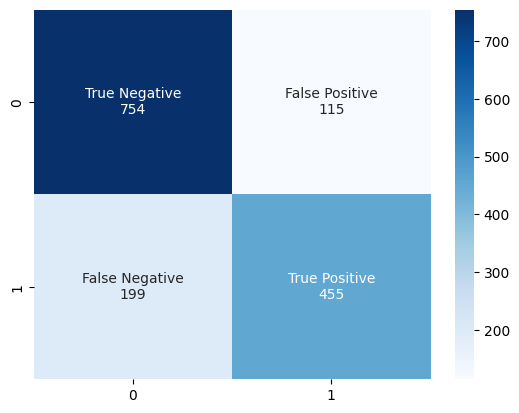

In [20]:
### **Code Solution:**
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Initialize Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier with the training vectors
classifier.fit(tfidf_train_vectors, y_train)

# Predict target labels on the test set
y_pred = classifier.predict(tfidf_test_vectors)

# Evaluate the model performance

f1score = round(f1_score(y_test, y_pred),2)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cnf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = [f"{value}" for value in cnf_matrix.flatten()]
labels = [f"{name}\n{count}" for name, count in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Plotting the confusion matrix
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [21]:
################ Don't edit or delete the cell, Run this cell to test your code  ################
try:
    q5 = [classifier,f1score]
    from tweet_prediction import tweets
    tweets.save_ans5(q5)
except:
    print("Please check if the variable to the question has been assigned properly")

Test case 5 passed


In [23]:
from tweet_prediction import tweets
try:
    q1 = data_cleaned
    q2 = clean_df
    q3 = sample_df
    q4 = [X_train, X_test, tfidf_train_vectors, tfidf_test_vectors]
    q5 = [classifier,f1score]
    
    tweets.save_answer(q1,q2,q3,q4,q5)
 
except:
    print("Assign the answers to all the variables properly.")
    tweets.remove_pickle()
    
    try:
        q1 = data_cleaned
        tweets.save_ans1(q1)
    except:
        pass
    try:
        q2 = clean_df
        tweets.save_ans2(q2)
    except:
        pass
    try:
        q3 = sample_df
        tweets.save_ans3(q3)
    except:
        pass
    try:
        q4 = [X_train, X_test, tfidf_train_vectors, tfidf_test_vectors]
        tweets.save_ans4(q4)
    except:
        pass
    try:
        q5 = [classifier,f1score]
        tweets.save_ans5(q5)
    except:
        pass


Test case 1 passed
Test case 2 passed
Test case 3 passed
Test case 4 passed
Test case 5 passed
